In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import googlemaps
import folium
import json

# 전체 코드 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

# 서울시 5대 범죄

In [3]:
big5=pd.read_csv('../[0]data/서울시_5대범죄.csv',index_col=1)
big5

,ID,지역코드,합계,살인,강도,강간강제추행,절도,폭력
기간코드,,,,,,,,
17,0,111261,7720,7,20,607,3130,3956
17,1,111231,5969,15,5,455,2304,3190
17,2,111273,5576,6,1,288,2274,3007
17,3,111251,5525,8,7,379,1979,3152
17,4,111201,5278,3,8,500,2094,2673
...,...,...,...,...,...,...,...,...
19,70,111281,3105,6,10,153,1157,1779
19,71,111191,2943,2,5,175,1226,1535
19,72,111161,2877,3,3,176,1082,1613


In [4]:
big5["지역코드"].replace([111181,111191,111201,111301,111212,111221,111281,111231,111241,111273,111274,111123,111121,111131,111142,111141,111152,111161,111291,111171,111251,111262,111261,111151,111311],["은평구","서대문구","마포구","양천구","강서구","구로구","금천구","영등포구","동작구","송파구","강동구","종로구","중구","용산구","성동구","광진구","동대문구","성북구","강북구","도봉구","관악구","서초구","강남구","중랑구","노원구"], inplace=True)

In [5]:
big5

,ID,지역코드,합계,살인,강도,강간강제추행,절도,폭력
기간코드,,,,,,,,
17,0,강남구,7720,7,20,607,3130,3956
17,1,영등포구,5969,15,5,455,2304,3190
17,2,송파구,5576,6,1,288,2274,3007
17,3,관악구,5525,8,7,379,1979,3152
17,4,마포구,5278,3,8,500,2094,2673
...,...,...,...,...,...,...,...,...
19,70,금천구,3105,6,10,153,1157,1779
19,71,서대문구,2943,2,5,175,1226,1535
19,72,성북구,2877,3,3,176,1082,1613


In [6]:
big5.drop("ID", axis = 1, inplace = True)

In [7]:
big5

,지역코드,합계,살인,강도,강간강제추행,절도,폭력
기간코드,,,,,,,
17,강남구,7720,7,20,607,3130,3956
17,영등포구,5969,15,5,455,2304,3190
17,송파구,5576,6,1,288,2274,3007
17,관악구,5525,8,7,379,1979,3152
17,마포구,5278,3,8,500,2094,2673
...,...,...,...,...,...,...,...
19,금천구,3105,6,10,153,1157,1779
19,서대문구,2943,2,5,175,1226,1535
19,성북구,2877,3,3,176,1082,1613


In [8]:
big5_17 = big5.iloc[0:25]

In [9]:
big5_18 = big5.iloc[25:50]

In [10]:
big5_19 = big5.iloc[50:]

In [11]:
big5_17['살인'].sum()
big5_17['강도'].sum()
big5_17['강간강제추행'].sum()
big5_17['절도'].sum()
big5_17['폭력'].sum()
print("--------")
big5_18['살인'].sum()
big5_18['강도'].sum()
big5_18['강간강제추행'].sum()
big5_18['절도'].sum()
big5_18['폭력'].sum()
print("--------")
big5_19['살인'].sum()
big5_19['강도'].sum()
big5_19['강간강제추행'].sum()
big5_19['절도'].sum()
big5_19['폭력'].sum()

142

169

6963

41162

59399

--------


143

143

6412

39175

56075

--------


136

136

6469

42204

54723

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, '<2017~19년 서울 5대 범죄 비율>')

([<matplotlib.patches.Wedge at 0x1dfd9376c70>,
 [Text(-1.4116910640227245, -0.5070782383009432, '살인'),
  Text(-1.1879662353700526, -0.16951762038415055, '강간강제추행'),
  Text(-1.4971513347633085, 0.09240065376632538, '강도'),
  Text(-0.30846564190812725, 1.0870827695084708, '절도'),
  Text(0.5259008969619965, -1.0001641098212672, '폭력')],
 [Text(-0.9411273760151495, -0.33805215886729545, '0.1 %'),
  Text(-0.692980303965864, -0.09888527855742116, '6.3 %'),
  Text(-0.9981008898422056, 0.061600435844216914, '0.1 %'),
  Text(-0.1719764198248851, 0.6060726945047227, '39.1 %'),
  Text(0.2932013850319095, -0.5576136187499099, '54.3 %')])

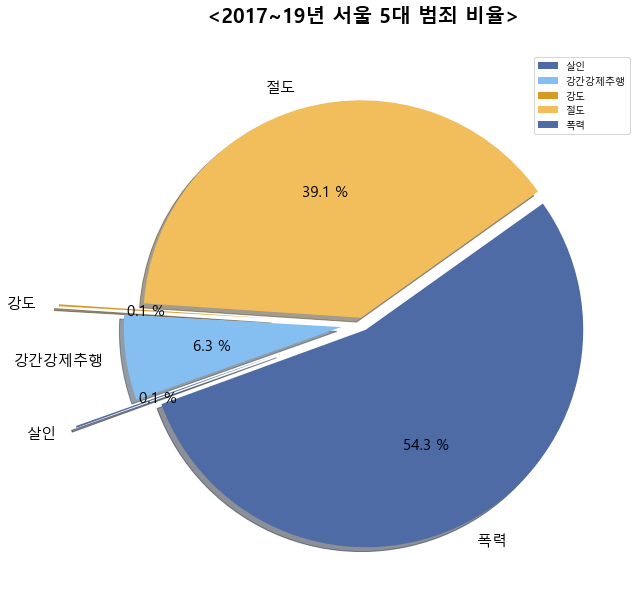

<Figure size 432x288 with 0 Axes>

In [12]:
labels=['살인', '강간강제추행', '강도', '절도', '폭력']
size=[140.33,6614.66,149.33,40847,56732.33]
colors=['#4E6BA6','#85BFF2','#D99A25', '#F2BE5C', '#4E6BA6']
explode=[0.4,0.1,0.4,0.03,0.03]

plt.figure(figsize=(10,10))
plt.title('<2017~19년 서울 5대 범죄 비율>',fontsize=20,pad=30,fontweight="bold")
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(size, labels=labels, colors=colors,startangle=200,autopct='%1.1f %%',counterclock=False,explode=explode,shadow=True,
       textprops = {'fontsize':15})
plt.legend(labels=labels, loc='upper right')
plt.show()

plt.savefig('../[1]시각화/시각화_17-19_서울_5대범죄_비율.png')